In [5]:
import pandas as pd
df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
print(df.shape)
print(df.columns)


(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [7]:
#Keep only useful columns
df = df[['Age', 'JobRole', 'Department', 'MonthlyIncome',
         'YearsAtCompany', 'PerformanceRating',
         'MaritalStatus', 'DistanceFromHome', 'Attrition']]

#Confirm the new shape & preview
print(df.shape)
df.head()


(1470, 9)


,Age,JobRole,Department,MonthlyIncome,YearsAtCompany,PerformanceRating,MaritalStatus,DistanceFromHome,Attrition
0,41,Sales Executive,Sales,5993,6,3,Single,1,Yes
1,49,Research Scientist,Research & Development,5130,10,4,Married,8,No
2,37,Laboratory Technician,Research & Development,2090,0,3,Single,2,Yes
3,33,Research Scientist,Research & Development,2909,8,3,Married,3,No
4,27,Laboratory Technician,Research & Development,3468,2,3,Married,2,No


In [8]:
# Encode categorical columns

# 3.1 Convert Attrition to numeric
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 3.2 One-hot encode other categorical columns
df = pd.get_dummies(df, columns=['JobRole', 'Department', 'MaritalStatus'], drop_first=True)

# 3.3 Preview new DataFrame
print(df.shape)
df.head()


(1470, 18)


,Age,MonthlyIncome,YearsAtCompany,PerformanceRating,DistanceFromHome,Attrition,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Research & Development,Department_Sales,MaritalStatus_Married,MaritalStatus_Single
0,41,5993,6,3,1,1,False,False,False,False,False,False,True,False,False,True,False,True
1,49,5130,10,4,8,0,False,False,False,False,False,True,False,False,True,False,True,False
2,37,2090,0,3,2,1,False,True,False,False,False,False,False,False,True,False,False,True
3,33,2909,8,3,3,0,False,False,False,False,False,True,False,False,True,False,True,False
4,27,3468,2,3,2,0,False,True,False,False,False,False,False,False,True,False,True,False


In [9]:
import numpy as np

# 4.1 Set random seed for repeatable results
np.random.seed(42)

# 4.2 Simulate TasksCompletedLastMonth
# Simple logic: base tasks = income / 1000 + random noise
df['TasksCompletedLastMonth'] = (df['MonthlyIncome'] / 1000) + np.random.normal(0, 2, len(df))

# Make sure no negative or zero tasks
df['TasksCompletedLastMonth'] = df['TasksCompletedLastMonth'].clip(lower=1).round()

# 4.3 Check distribution
df[['MonthlyIncome', 'TasksCompletedLastMonth']].head()


,MonthlyIncome,TasksCompletedLastMonth
0,5993,7.0
1,5130,5.0
2,2090,3.0
3,2909,6.0
4,3468,3.0


In [10]:
# 5.1 Simulate TasksCompletedNextMonth

# Logic: slight drop or fluctuation
df['TasksCompletedNextMonth'] = df['TasksCompletedLastMonth'] - np.random.normal(0.5, 1, len(df))

# Clip to minimum 1 task (no negative tasks!)
df['TasksCompletedNextMonth'] = df['TasksCompletedNextMonth'].clip(lower=1).round()

# 5.2 Check sample
df[['TasksCompletedLastMonth', 'TasksCompletedNextMonth']].head(10)


,TasksCompletedLastMonth,TasksCompletedNextMonth
0,7.0,5.0
1,5.0,5.0
2,3.0,3.0
3,6.0,5.0
4,3.0,3.0
5,3.0,2.0
6,6.0,6.0
7,4.0,3.0
8,9.0,9.0
9,6.0,6.0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 6.1 Prepare features and target
X_reg = df[['TasksCompletedLastMonth']]   # input
y_reg = df['TasksCompletedNextMonth']     # output

# 6.2 Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# 6.3 Create & train model
reg = LinearRegression()
reg.fit(X_train, y_train)

# 6.4 Predict on test data
y_pred = reg.predict(X_test)

# 6.5 Evaluate RMSE (lower = better)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Regression RMSE: {rmse:.2f}")



Regression RMSE: 0.92


In [12]:
# 7.1 Use your model to predict next month’s tasks for everyone
df['PredictedNextTasks'] = reg.predict(df[['TasksCompletedLastMonth']])

# 7.2 Make sure it’s rounded & no negative
df['PredictedNextTasks'] = df['PredictedNextTasks'].clip(lower=1).round()

# 7.3 Check sample
df[['TasksCompletedLastMonth', 'TasksCompletedNextMonth', 'PredictedNextTasks']].head(10)


,TasksCompletedLastMonth,TasksCompletedNextMonth,PredictedNextTasks
0,7.0,5.0,7.0
1,5.0,5.0,5.0
2,3.0,3.0,3.0
3,6.0,5.0,6.0
4,3.0,3.0,3.0
5,3.0,2.0,3.0
6,6.0,6.0,6.0
7,4.0,3.0,4.0
8,9.0,9.0,9.0
9,6.0,6.0,6.0


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 8.1 Define features for Model A (only original features)
original_features = [col for col in df.columns 
                     if col not in ['Attrition', 
                                    'TasksCompletedLastMonth', 
                                    'TasksCompletedNextMonth',
                                    'PredictedNextTasks']]

# 8.2 Define features for Model B (original + predicted output)
features_plus_output = original_features + ['PredictedNextTasks']

# 8.3 Prepare target
y = df['Attrition']

# 8.4 Split for Model A
X_A = df[original_features]
X_train_A, X_test_A, y_train, y_test = train_test_split(X_A, y, test_size=0.2, random_state=42)

# 8.5 Split for Model B
X_B = df[features_plus_output]
X_train_B, X_test_B, _, _ = train_test_split(X_B, y, test_size=0.2, random_state=42)

# 8.6 Logistic Regression for both
clf_A = LogisticRegression(max_iter=1000)
clf_A.fit(X_train_A, y_train)
y_pred_A = clf_A.predict(X_test_A)

clf_B = LogisticRegression(max_iter=1000)
clf_B.fit(X_train_B, y_train)
y_pred_B = clf_B.predict(X_test_B)

# 8.7 Compare performance
print(" Model A (No Predicted Output)")
print(classification_report(y_test, y_pred_A))

print("\nModel B (With Predicted Output)")
print(classification_report(y_test, y_pred_B))


C:\Users\Anil\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Model A (No Predicted Output)
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294


Model B (With Predicted Output)
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



C:\Users\Anil\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anil\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Anil\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precisi

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Use same training data
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

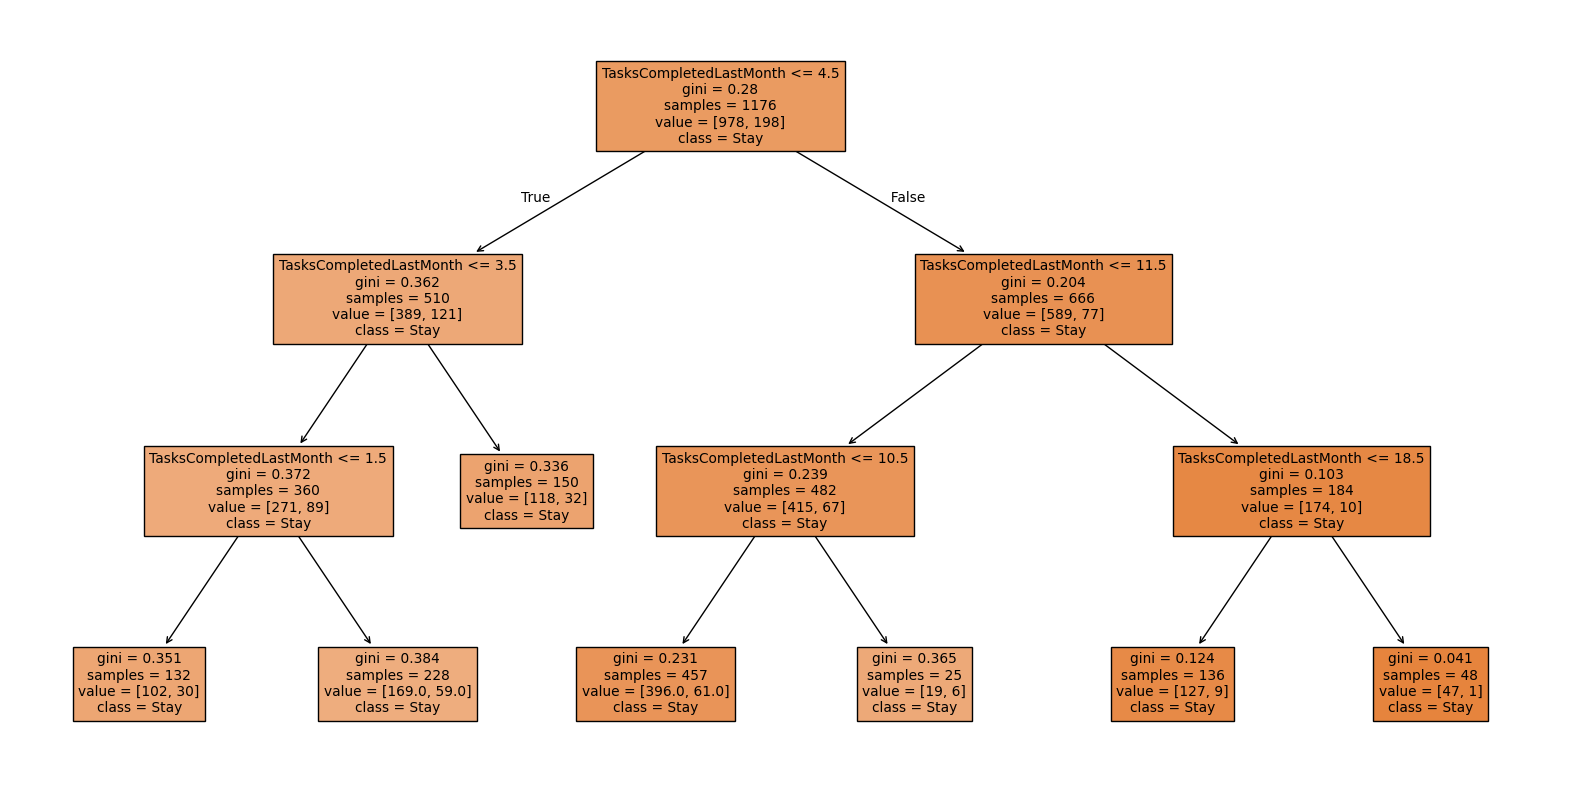

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_train.columns, class_names=['Stay', 'Leave'], filled=True)
plt.show()


In [16]:
import joblib

joblib.dump(clf_B, 'attrition_model.pkl')
joblib.dump(reg, 'work_output_model.pkl')

print("Models saved! Upload to GitHub")


Models saved! Upload to GitHub


In [19]:
import joblib

# Save the regression model (your regressor for predicting tasks next month)
joblib.dump(reg, 'regression_model.joblib')

# Save the classification model (your best attrition predictor, e.g., Model B)
joblib.dump(clf_B, 'classification_model.joblib')

print("Models saved successfully!")



Models saved successfully!


In [20]:
import joblib



joblib.dump(reg, 'regression_model.joblib')
print("Regression model saved!")


Regression model saved!


In [21]:
print(X_B.columns)


Index(['Age', 'MonthlyIncome', 'YearsAtCompany', 'PerformanceRating',
       'DistanceFromHome', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'Department_Research & Development',
       'Department_Sales', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'PredictedNextTasks'],
      dtype='object')


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

#  Load your DataFrame as usual
# df = pd.read_csv(...)   # or use the already cleaned df

#  Make sure you have these 2 columns:
print(df[['TasksCompletedLastMonth', 'TasksCompletedNextMonth']].head())

#  Use only 1 feature
X = df[['TasksCompletedLastMonth']]
y = df['TasksCompletedNextMonth']

#  Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train
reg = LinearRegression()
reg.fit(X_train, y_train)

#  Predict to check
y_pred = reg.predict(X_test)

# Save
joblib.dump(reg, '../models/regression_model.joblib')

print("✅ Regression model trained and saved with 1 feature: TasksCompletedLastMonth")


   TasksCompletedLastMonth  TasksCompletedNextMonth
0                      7.0                      5.0
1                      5.0                      5.0
2                      3.0                      3.0
3                      6.0                      5.0
4                      3.0                      3.0
✅ Regression model trained and saved with 1 feature: TasksCompletedLastMonth


In [23]:
print(df[['TasksCompletedLastMonth', 'TasksCompletedNextMonth']].head())


   TasksCompletedLastMonth  TasksCompletedNextMonth
0                      7.0                      5.0
1                      5.0                      5.0
2                      3.0                      3.0
3                      6.0                      5.0
4                      3.0                      3.0


In [24]:
X = df[['TasksCompletedLastMonth']]
y = df['TasksCompletedNextMonth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
reg = LinearRegression()
reg.fit(X_train, y_train)

# Quick test
pred = reg.predict([[10]])
print(f"Predicted tasks for last month 10: {pred[0]:.2f}")


Predicted tasks for last month 10: 9.55


C:\Users\Anil\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
joblib.dump(reg, '../models/regression_model.joblib')

print("New regression model saved in models folder!")


New regression model saved in models folder!
